In [1]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline
from astropy.io import fits
from itertools import combinations
import pickle
from astropy.cosmology import WMAP9 as cosmo
from final_project import *

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

# Loading the data we need

## All the data:

In [3]:
data = pd.read_pickle('big_data')
data

,RA,DEC,Region,Stellarity,F115,F150,F200,F277,F356,F410,...,F140_ERROR,F160_ERROR,SPECTRAL_RED_SHIFT,STELLAR_MASS,STELLAR_MASS_ERR,PHOTOM_RED_SHIFT,Object,X,Y,SFR
0,215.024752,52.981212,1,0.821,139492.014814,136481.557209,114663.659470,50708.259260,128218.504232,89432.307145,...,5.243950e+01,33.285878,0.2500,10.319,0.299,0.25,nircam1-3,3033.1875,407.0526,3.827240
1,214.983212,52.952023,2,0.029,12304.995776,21132.884036,33883.504105,50716.320411,57724.468502,54145.566928,...,7.011145e+01,36.586082,1.0530,10.927,0.028,0.98,nircam1-2,7646.4517,419.7906,48.278900
2,214.984985,52.951200,2,0.364,18156.358950,27788.207956,40432.589604,55513.348304,60905.214135,55111.550498,...,7.434307e+01,32.467366,1.1200,11.045,0.026,1.12,nircam1-1,7638.5312,258.1606,2.216390
3,215.034005,52.986189,1,0.029,37419.138223,52888.557422,68284.225064,56398.205674,40657.137985,44950.617224,...,9.681434e+01,26.294318,0.2703,9.475,0.038,0.34,nircam1-4,2144.9175,286.0022,4.595440
4,215.052963,52.997723,1,0.239,41989.647261,55761.184436,57043.162150,75103.933965,344.535744,3510.311943,...,4.056045e+14,252.310901,1.4200,10.233,0.857,1.42,nircam1-5,203.1697,142.7871,73.807900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,214.828826,52.798678,2,0.018,149.176427,137.486779,150.358874,241.272051,179.430492,134.343543,...,2.533252e+01,12.743761,4.3100,8.293,0.084,4.31,nircam6-8982,9581.9062,1246.8362,9.478430
9202,214.912746,52.844553,1,0.630,28.854944,30.528963,33.649958,15.605470,12.281535,3.918242,...,1.486475e+01,6.138284,2.5100,7.177,0.148,2.51,nircam6-9253,1446.7140,171.2970,0.726535
9203,214.904154,52.839601,1,0.482,0.005228,0.009379,0.000662,6.055759,8.566630,2.795595,...,1.333602e+01,6.558073,1.0600,6.172,0.013,1.06,nircam6-9247,2302.7722,260.9615,0.030849
9204,214.919315,52.849213,1,0.582,3.367262,7.235462,4.831313,31.423566,62.489169,99.214582,...,4.897944e+01,21.401037,1.0300,8.026,0.169,1.03,nircam6-9154,712.2482,170.8571,5.131350


## A smaple of one pointing (2)

In [4]:
df2 = pd.read_pickle('df2')
df2

,RA,DEC,Region,Stellarity,F115,F150,F200,F277,F356,F410,...,F140_ERROR,F160_ERROR,SPECTRAL_RED_SHIFT,STELLAR_MASS,STELLAR_MASS_ERR,PHOTOM_RED_SHIFT,Object,X,Y,SFR
0,214.960976,52.932000,1,0.001,188.682528,302.025264,195.666162,155.926448,281.731762,0.059924,...,6.479635e+01,2.714110e+01,4.1400,0.000,0.000,4.1400,nircam2-1,520.2705,1733.1802,7.980180
1,214.850041,52.910182,2,0.684,-9.248760,-26.392688,-34.805836,-57.390153,-34.328892,-18.832713,...,-4.442541e+01,-2.595991e+01,6.0018,8.352,0.140,6.0018,nircam2-31,7713.2373,6153.0210,6.879760
2,214.850641,52.910812,2,0.700,8.621534,16.670631,20.642629,40.275024,26.558330,8.663765,...,2.762962e+01,1.987652e+01,1.5800,8.280,0.096,1.5800,nircam2-20,7627.5659,6168.7734,1.689560
3,214.850733,52.910972,2,0.015,266.958468,494.064654,463.141290,603.369995,518.749640,438.881384,...,5.368722e+01,3.406584e+01,1.5800,8.280,0.096,1.5800,nircam2-20,7608.6050,6176.1919,1.689560
4,214.849914,52.910643,2,0.028,28049.476079,41588.845170,53508.568645,23560.603364,21245.940958,42407.217092,...,4.899179e+02,3.660265e+02,0.1100,7.585,0.191,0.1100,nircam2-2,7677.0381,6195.7827,0.316689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8749,214.950729,52.924874,1,0.019,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+12,1.000000e+12,8.3101,9.973,0.101,8.3101,nircam2-8762,1651.9840,1743.3491,25.394400
8750,214.950679,52.924834,1,0.019,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+12,1.000000e+12,8.3101,9.973,0.101,8.3101,nircam2-8762,1657.9917,1743.0000,25.394400
8751,214.959848,52.931333,1,0.001,3.853150,3.098311,-9.239871,129.954271,-3.646456,0.013774,...,1.000000e+12,1.000000e+12,-1.0000,0.000,0.000,-1.0000,nircam2-8761,634.2019,1743.4180,0.000000
8752,214.950833,52.924951,1,0.019,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+12,1.000000e+12,-1.0000,0.000,0.000,-1.0000,nircam2-8763,1640.0358,1743.6152,0.000000


## The Cut Data

In [5]:
cut_data = pd.read_pickle('big_cut_data')
cut_data

,RA,DEC,Region,Stellarity,F115,F150,F200,F277,F356,F410,...,F140_ERROR,F160_ERROR,SPECTRAL_RED_SHIFT,STELLAR_MASS,STELLAR_MASS_ERR,PHOTOM_RED_SHIFT,Object,X,Y,SFR
0,215.024752,52.981212,1,0.821,139492.014814,136481.557209,114663.659470,50708.259260,128218.504232,89432.307145,...,52.439496,3.328588e+01,0.2500,10.319,0.299,0.2500,nircam1-3,3033.1875,407.0526,3.827240
1,214.983212,52.952023,2,0.029,12304.995776,21132.884036,33883.504105,50716.320411,57724.468502,54145.566928,...,70.111446,3.658608e+01,1.0530,10.927,0.028,0.9800,nircam1-2,7646.4517,419.7906,48.278900
2,215.034005,52.986189,1,0.029,37419.138223,52888.557422,68284.225064,56398.205674,40657.137985,44950.617224,...,96.814335,2.629432e+01,0.2703,9.475,0.038,0.3400,nircam1-4,2144.9175,286.0022,4.595440
3,214.940036,52.973504,2,0.915,3486.751272,5420.221424,7596.494780,11720.049401,13797.090490,13719.954188,...,34.186826,2.560313e+01,1.1200,10.253,0.025,1.1200,nircam1-63,7706.6348,4467.1123,34.590100
4,214.948737,52.979825,2,0.415,372.151522,738.973788,1272.797392,2067.913355,2695.096097,3079.245105,...,27.896768,3.566832e+13,2.8400,9.943,0.198,2.8400,nircam1-84,6721.5366,4479.7754,176.771000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33137,214.917728,52.849546,1,0.693,15.992764,15.727966,15.195470,15.243228,15.018155,13.586371,...,12.592587,4.634549e+00,8.1501,8.487,1.245,8.1501,nircam6-9108,756.3657,284.3708,3.805030
33138,214.912216,52.845432,1,0.376,6.091118,6.154537,4.123695,4.743662,6.412815,0.775138,...,8.052594,3.195565e+00,3.2600,7.051,0.117,3.2600,nircam6-9176,1391.2582,268.9023,0.342881
33139,214.905469,52.840647,1,0.432,3.431785,4.028424,3.851416,8.998598,9.090087,12.688858,...,15.654542,7.391690e+00,1.8432,7.287,0.043,1.8432,nircam6-9142,2145.4531,269.6397,0.051668
33140,214.828826,52.798678,2,0.018,149.176427,137.486779,150.358874,241.272051,179.430492,134.343543,...,25.332524,1.274376e+01,4.3100,8.293,0.084,4.3100,nircam6-8982,9581.9062,1246.8362,9.478430


## The EELGs

In [6]:
eelgs = pd.read_pickle('eelgs')
eelgs

,RA,DEC,Region,Stellarity,F115,F150,F200,F277,F356,F410,...,SPECTRAL_RED_SHIFT,STELLAR_MASS,STELLAR_MASS_ERR,PHOTOM_RED_SHIFT,Object,X,Y,SFR,Area,SHAPE
4,214.955712,52.983426,2,0.959,12.111284,6.617296,14.575215,19.126765,50.955854,19.845123,...,7.2401,8.977,0.209,7.2401,nircam1-342,6065.7910,4376.1494,3.136160,Top,p3p44
11,214.940369,52.970817,2,0.143,35.397019,24.001542,30.455694,68.656104,53.023521,29.067086,...,6.4801,8.347,0.143,6.4801,nircam1-641,7936.6235,4239.7817,4.404910,Top,w277
24,214.930437,52.960170,2,0.624,52.093099,43.950960,55.730953,121.401970,59.780602,30.684665,...,4.3500,8.268,0.310,4.3500,nircam1-1233,9374.9424,3958.6521,4.183520,Top,w277
28,214.951152,52.973409,2,0.778,27.697692,27.168353,27.720895,66.323156,42.228875,22.483288,...,4.5500,8.884,0.262,4.5500,nircam1-1478,7194.8125,3847.8994,1.600630,Top,w277
40,214.951936,52.971742,2,0.659,10.303382,38.746461,37.489974,54.789717,65.729269,64.936031,...,9.1601,9.267,0.858,9.1601,nircam1-1850,7310.4062,3675.0889,12.458800,Top,p44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,214.846157,52.809369,2,0.922,47.173621,42.404916,38.862905,41.866656,46.295612,101.248204,...,7.1201,8.328,0.074,7.1201,nircam6-7356,7790.2964,1118.0483,5.525850,Bottom,w410
529,214.847196,52.808349,2,0.969,41.865877,44.323613,36.159395,40.938175,39.514535,121.506241,...,7.0801,8.663,0.128,7.0801,nircam6-7644,7834.8018,981.3619,2.706410,Bottom,w410
537,214.900216,52.844548,1,0.889,17.418578,17.311144,13.874501,36.747642,15.034757,57.897959,...,4.7300,8.015,0.204,4.7300,nircam6-7927,2035.3304,862.9374,0.608112,Bottom,p410sp277
544,214.860355,52.813352,2,0.855,20.764329,24.658043,17.867454,19.673407,22.070584,49.415672,...,7.3301,8.135,0.979,7.3301,nircam6-8393,6759.5356,642.1173,2.794460,Bottom,w410


# The cuts:

* the data was cut seperately in another notebook. The following cuts were applied:

#### For our potential EELGs, we:

- color select: **1297** selected

- EW>5000: **638** selected

- throw out sources within 100 pixels of an edge

- throw out sources wihtin 1 arcsec of a source that is 100 nJy brighter than it: **555** sources

- select them to be brighter in 277 than 200 with a leniency of 10 nJy: **458** sources

- select those with at least 5 real observations not dimmer than 10nJy: **232** sources

- I also introduced a new cut for a photometric redshift >4. :after this final cut we have **203** possible EELGs.

- After finally throwing out by eye sources whose SEDs were clearly not EELGs (image artifacts, reddened galaxies) we have **182** remaining sources.

#### For our data:

- We appried all cuts above not meant to select for EELG candidates. We initially had **36,188** sources detected across 6 pointings. After these cuts we had **28,195** sources. The most extreme loss was in pointing 6 due to what seems to be an overdensity of sources. This could be why there seem to be less sources in this area or it could be a true spatial overdensity in the other pointings. Pointing 6 seems to be particularly over-dense with sources. This could indicate a more dynamic aproach to source selection is necessary. This could be something we think about later given enough time.

### The color selection:

* we may want to include this figure in the proposal. The sources are selected to be "extreme" in the color-color diagram of the three redest filters available to NIRCam. These color-selected sources are then selected to have equivalent widths > 5000 AA.

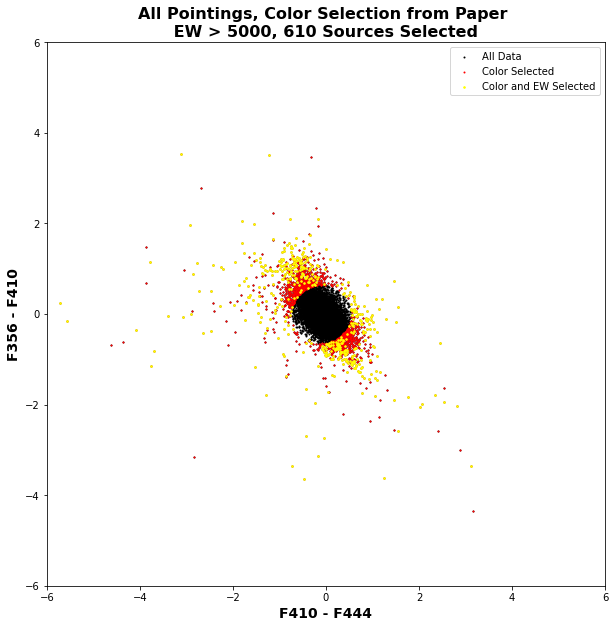

* The EELGs went through the spatial selection and these were the plotted results:

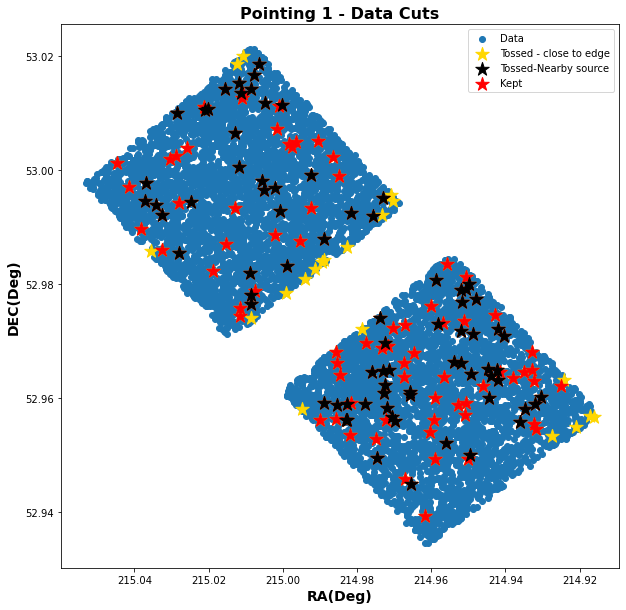

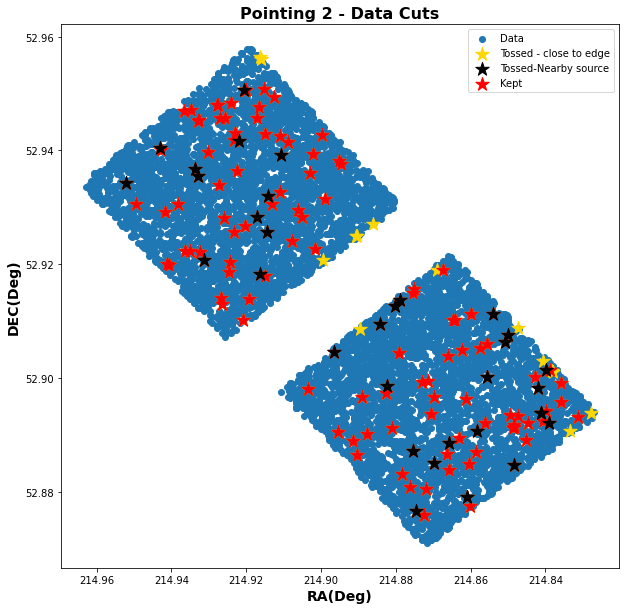

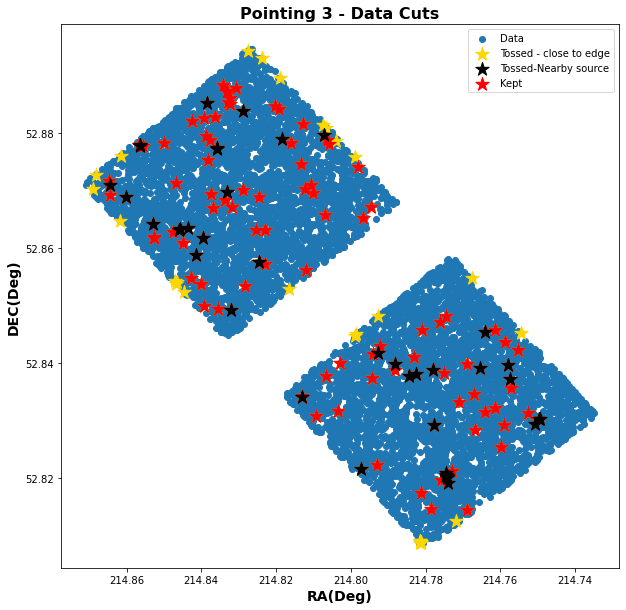

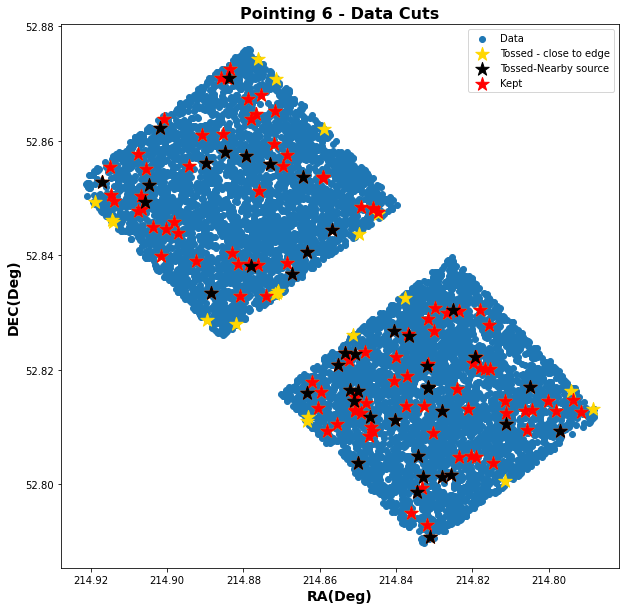

* these same plots for all data illustrate the over-density of sources in pointing 1.

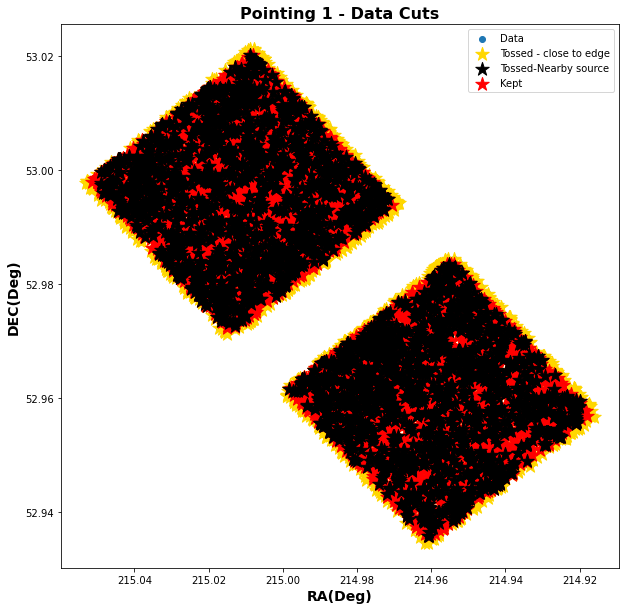

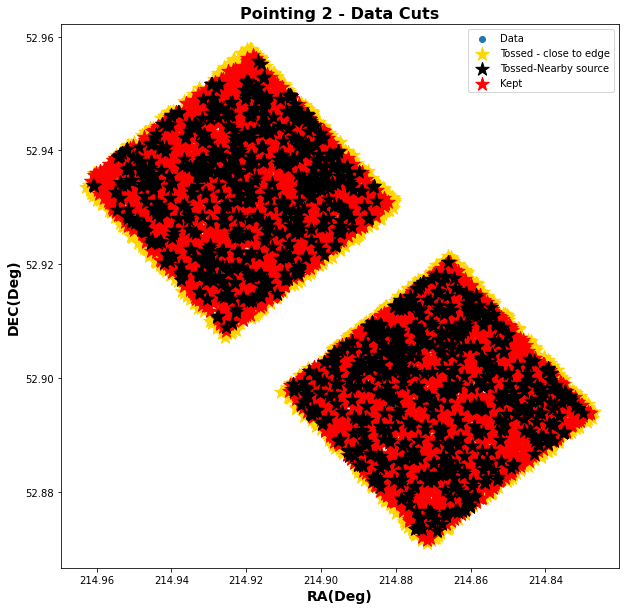

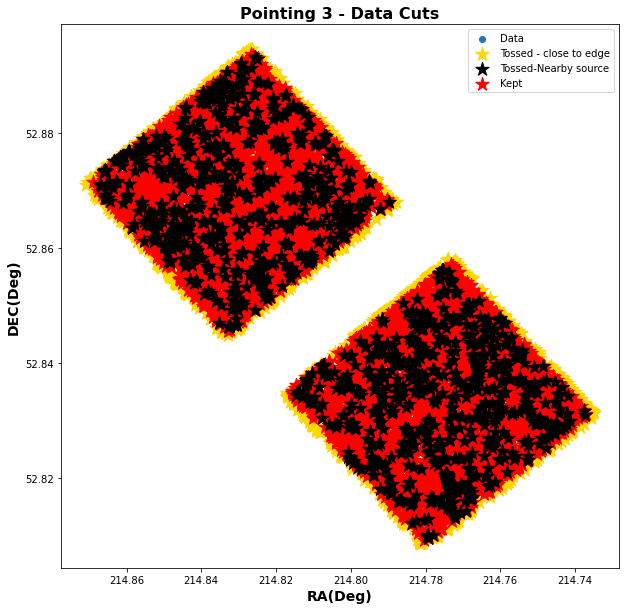

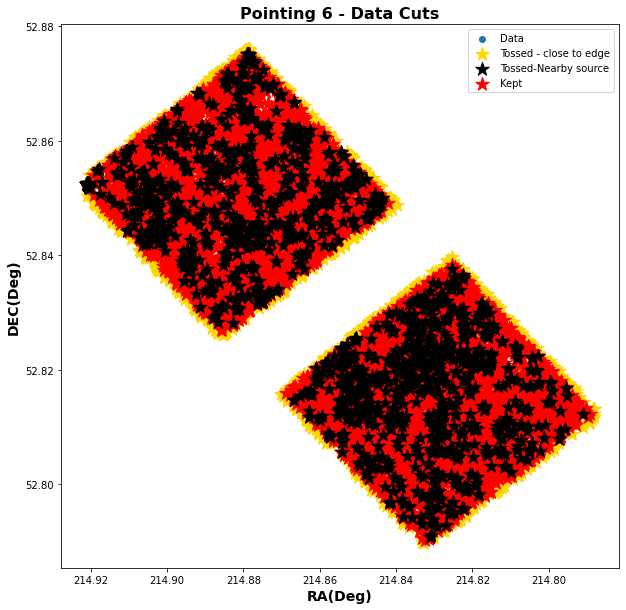

# Generating the SEDs:

* We can look at all the final selected SEDs on the same plot (although this is a mess):

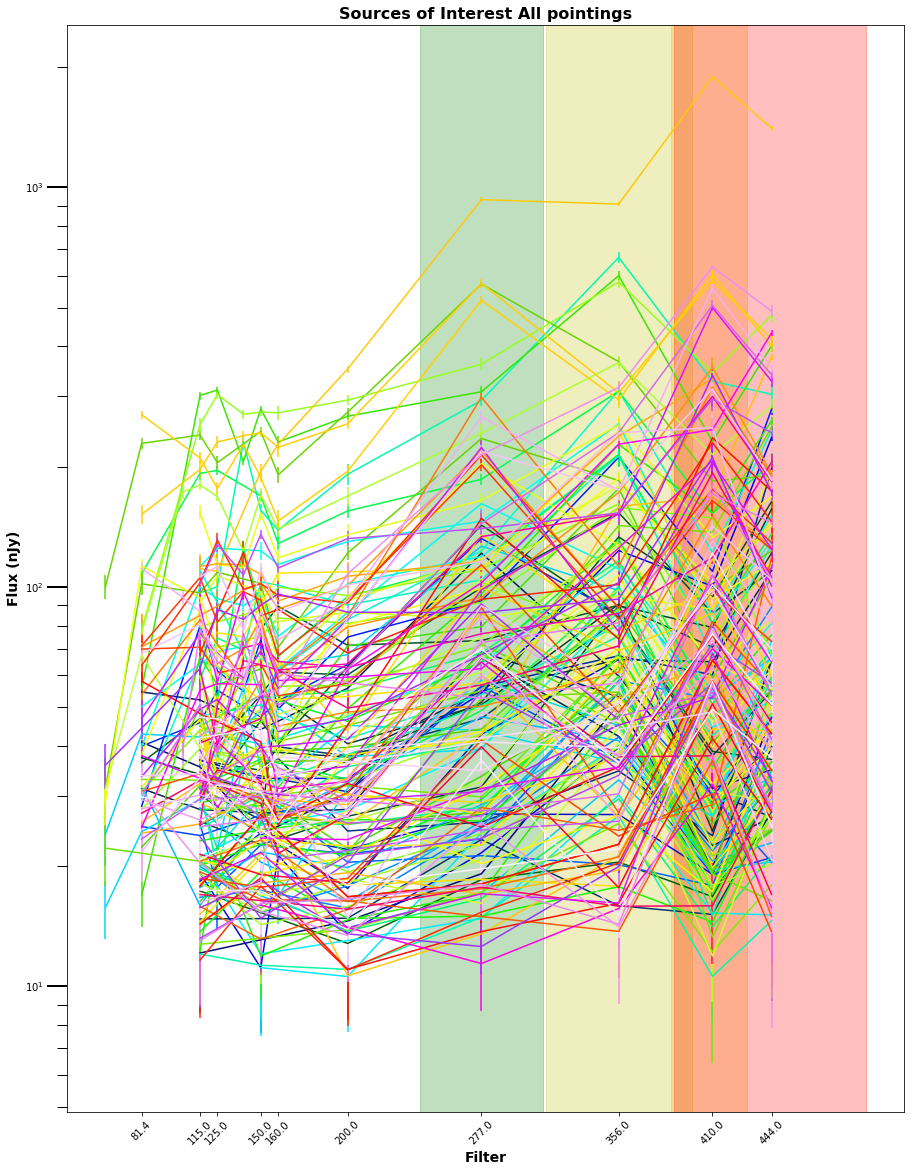

In [20]:
sed_flux = []
sed_err = []
sed_filters = []

plt.rcParams['figure.figsize'] = (15, 20)
#plot_sources(remaining['Object'], remaining, df_col6, 6)
df = eelgs
sources = eelgs['Object']
#plt.rcParams['figure.figsize'] = (20, 10)
#Grab filters from DataFrame
fs = []
fs_strings = []
a=df.index[0]
c=0
try:
    fs = []
    fs_strings = []
    for key in df.loc[a][4:17].keys():
        fs.append(float(key.split('F')[1]))
        fs_strings.append(key)
    start=4
    stop=17
    stop2 = 30
    f_final = []
    for f in fs:
        if f>600:
            f_final.append(f*.1)
        else:
            f_final.append(f)
except:
    fs = []
    fs_strings = []
    c+=1
    for key in df.loc[a][4:16].keys():
        fs.append(float(key.split('F')[1]))
        fs_strings.append(key)
    start = 4
    stop = 16
    stop2=28
    f_final = []
    for f in fs:
        if f>600:
            f_final.append(f*.1)
        else:
            f_final.append(f)
#Create a colormap 
colormap = plt.cm.gist_ncar
colors = [colormap(i) for i in np.linspace(0, 1,len(sources)+2)][1:-1]
#Create an SED for each of the sources
i=0
n=0
for obj in sources:
    #Increase the iteration tracker, grab the DataFrame for just this object
    n+=1
    #print(shapes[i])
    mk = np.array(df['Object']) == np.array(obj)
    a = df[mk]
    #Get the redshift and filters
    rs = a['PHOTOM_RED_SHIFT']
    filters = np.array(a.keys()[start:stop].values)
    filter_er = np.array(a.keys()[stop:stop2].values)
    #Mask the data so all filter values are greater than 3 times their error
    mask = (a[filters].values[0] > (3*a[filter_er].values[0]))& (a[filter_er].values[0]>0) 
    #Sort the data so the SED plot connects from left to right, regardless of filter input order
    z = sorted(zip(np.array(f_final)[mask],a[filters].values[0][mask]))
    x=[i[0] for i in z]
    y=[i[1] for i in z]
    plt.errorbar(x,y,a[filter_er].values[0][mask], label = f'Redshift = {rs.values[0]}, {obj}',
                color = colors[n-1])
    #Add the x ticks
    plt.xticks(np.array(f_final)[mask])

    sed_flux.append(a[filters].values[0][mask])
    sed_err.append(a[filter_er].values[0][mask])
    sed_filters.append(np.array(f_final)[mask])
    


#Add 277, 356, 410, and 444 filters
plt.axvspan(314, 398, label= 'F356', color = 'y', alpha = .25)
plt.axvspan(386.4, 430.1, label= 'F410', alpha = 0.25, color = 'orange')
plt.axvspan(388, 498.6, label= 'F444', color = 'r', alpha = .25)
plt.axvspan(241.6, 312.7, label= 'F277', color = 'g', alpha = .25)
#Add titles and labels
plt.title(f'Sources of Interest All pointings')
plt.ylabel('Flux (nJy)')
plt.yscale("log")
plt.xlabel('Filter')
plt.xticks(rotation = 45)
plt.tick_params('y', length=20, width=2, which='major')
plt.tick_params('y', length=10, width=1, which='minor')

We won't plot all the SEDs here. That would get a little intense. Instead here is the first SED from the dataset:

In [37]:
def plot_sed(num):
    flux = sed_flux[num]
    flux_er = sed_err[num]
    filters = sed_filters[num]

    plt.rcParams['figure.figsize'] = (10, 5)

    plt.errorbar(filters,flux, flux_er, label = f'Redshift = {rs.values[0]}, {obj}',
                color = 'k')
    #Add the x ticks
    plt.xticks(np.array(f_final)[mask])

    #Add 277, 356, 410, and 444 filters
    plt.axvspan(314, 398, label= 'F356', color = 'y', alpha = .25)
    plt.axvspan(386.4, 430.1, label= 'F410', alpha = 0.25, color = 'orange')
    plt.axvspan(388, 498.6, label= 'F444', color = 'r', alpha = .25)
    plt.axvspan(241.6, 312.7, label= 'F277', color = 'g', alpha = .25)
    #Add titles and labels
    plt.title(f'First Source: {sources.values[num]}')
    plt.ylabel('Flux (nJy)')
    #plt.yscale("log")
    plt.xlabel('Filter')
    plt.xticks(rotation = 45)
    plt.tick_params('y', length=20, width=2, which='major')
    plt.tick_params('y', length=10, width=1, which='minor')

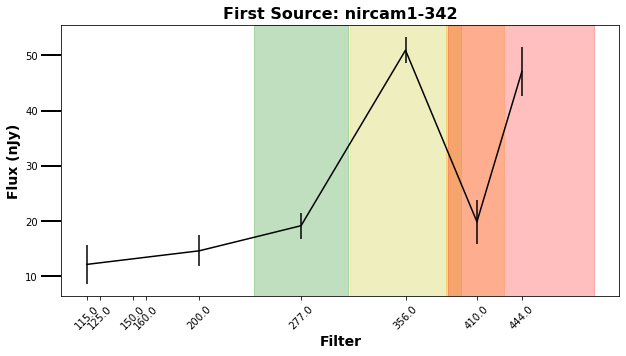

In [38]:
plot_sed(0)

# Fitting the SEDs

* we start by loading in the Astropy eazy library:

https://eazy-py.readthedocs.io/en/latest/index.html


If you are running this code for the first time you will likely need to properly install the library. If you get an error from the above line, follow installation instructions here:

https://eazy-py.readthedocs.io/en/latest/eazy/install.html#install-with-pip

The simplest case is to do a pip install for eazy. Once you've done this you'll be lacking some dependencies that don't come with the pip installer (dust attneuation and dust extinction). If you read the error you get when you run

```python
import eazy
```
in a cell, it will simply give you the two lines you will need to run in a command line to finish the installation.

In [41]:
import eazy